In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
power_data = pd.read_csv("../zhenjiang_power.csv", )
power_data['record_date'] = pd.to_datetime(power_data['record_date'], format='%Y-%m-%d %H:%M:%S')
power_data.head()

,user_id,record_date,power_consumption
0,1,2015-01-01,1135.0
1,1,2015-01-02,570.0
2,1,2015-01-03,3418.0
3,1,2015-01-04,3968.0
4,1,2015-01-05,3986.0


In [4]:
power_data.info()  # 查看信息是否缺失

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885486 entries, 0 to 885485
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            885486 non-null  int64         
 1   record_date        885486 non-null  datetime64[ns]
 2   power_consumption  885486 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 20.3 MB


In [5]:
power_data.iloc[0].values

array([1, Timestamp('2015-01-01 00:00:00'), 1135.0], dtype=object)

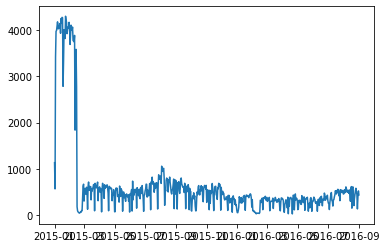

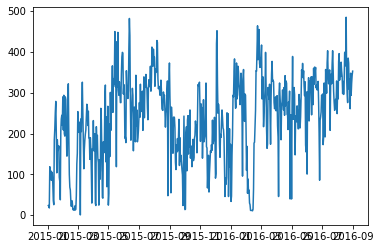

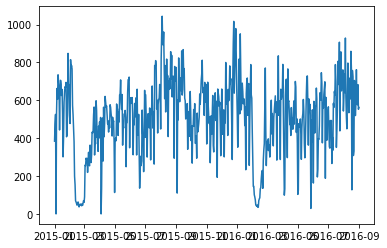

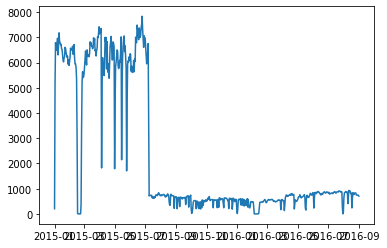

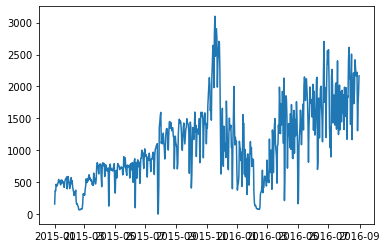

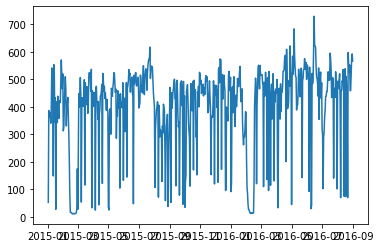

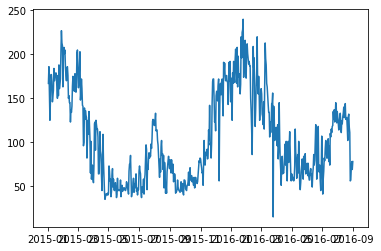

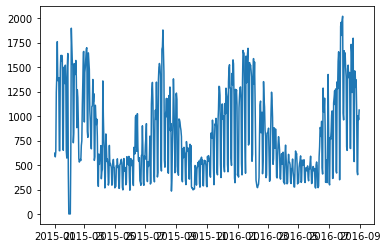

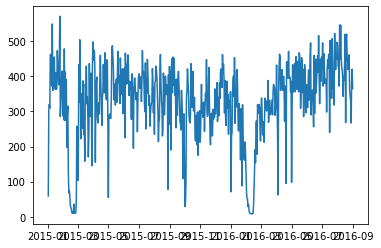

In [36]:
for i in range(1, 10):
    plt.plot('record_date', 'power_consumption', data=power_data[(power_data['user_id'] == i)])
    plt.show()



创建透视表

In [7]:
loads_wide_df = pd.pivot_table(data=power_data, columns=['record_date'], values='power_consumption', index=['user_id'])
print(type(loads_wide_df))
loads_wide_df.head()

<class 'pandas.core.frame.DataFrame'>


record_date,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2016-08-22,2016-08-23,2016-08-24,2016-08-25,2016-08-26,2016-08-27,2016-08-28,2016-08-29,2016-08-30,2016-08-31
user_id,,,,,,,,,,,,,,,,,,,,,
1,1135.0,570.0,3418.0,3968.0,3986.0,4082.0,4172.0,4022.0,4025.0,4047.0,...,351.0,443.0,529.0,584.0,500.0,451.0,139.0,393.0,527.0,440.0
2,24.0,22.0,18.0,119.0,108.0,109.0,86.0,106.0,103.0,77.0,...,385.0,373.0,309.0,333.0,261.0,348.0,294.0,324.0,343.0,353.0
3,385.0,475.0,526.0,1.0,535.0,663.0,606.0,735.0,698.0,667.0,...,705.0,597.0,520.0,581.0,762.0,593.0,577.0,683.0,553.0,563.0
4,206.0,5134.0,6784.0,6475.0,6592.0,6742.0,6963.0,6301.0,6693.0,7176.0,...,788.0,838.0,826.0,825.0,750.0,748.0,744.0,750.0,729.0,707.0
5,156.0,368.0,359.0,467.0,433.0,452.0,467.0,495.0,542.0,502.0,...,1941.0,2417.0,2296.0,2175.0,2160.0,2222.0,1305.0,1719.0,1894.0,2166.0


In [8]:
print(loads_wide_df.index.values)

[   1    2    3 ... 1452 1453 1454]


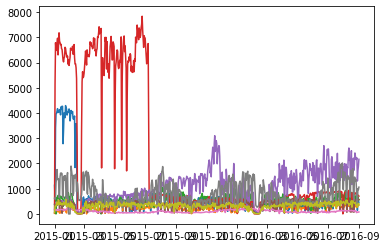

In [13]:
for label in range(1, 10):
    plt.plot([date for date in loads_wide_df.columns.values], [power for power in loads_wide_df.loc[label]],
             label=label)
plt.show()

In [23]:
from tslearn.utils import to_time_series
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score

time_series = to_time_series(loads_wide_df)

In [24]:
time_series

array([[1135.,  570., 3418., ...,  393.,  527.,  440.],
       [  24.,   22.,   18., ...,  324.,  343.,  353.],
       [ 385.,  475.,  526., ...,  683.,  553.,  563.],
       ...,
       [3511., 3494., 3419., ..., 9814., 9696., 9705.],
       [ 191.,  449.,  492., ..., 1241., 1129., 1108.],
       [ 976.,  520.,  536., ..., 2221., 1671., 2176.]])

In [26]:
seed = 0
np.random.seed(seed)
stack_data = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(time_series)
stack_data

array([[[ 0.5171527 ],
        [-0.10568415],
        [ 3.03385451],
        ...,
        [-0.30080295],
        [-0.15308589],
        [-0.24899174]],

       [[-2.08103212],
        [-2.1004661 ],
        [-2.13933408],
        ...,
        [ 0.83406585],
        [ 1.01868872],
        [ 1.11585866]],

       [[-0.62168358],
        [-0.16884254],
        [ 0.08776739],
        ...,
        [ 0.87772343],
        [ 0.2236197 ],
        [ 0.27393537]],

       ...,

       [[-0.14789232],
        [-0.15262411],
        [-0.17349969],
        ...,
        [ 1.6064911 ],
        [ 1.57364686],
        [ 1.57615193]],

       [[-1.32191588],
        [-0.81863851],
        [-0.73475895],
        ...,
        [ 0.72630597],
        [ 0.50782897],
        [ 0.46686454]],

       [[-0.03643653],
        [-0.66585741],
        [-0.64377247],
        ...,
        [ 1.68204812],
        [ 0.92287819],
        [ 1.61993422]]])

Init 1
0.309 --> 0.285 --> 0.282 --> 0.281 --> 0.280 --> 0.279 --> 0.279 --> 0.279 --> 0.279 --> 
Init 2
0.274 --> 0.268 --> 0.267 --> 0.263 --> 0.260 --> 0.259 --> 0.258 --> 0.258 --> 0.257 --> 0.257 --> 0.257 --> 0.256 --> 0.257 --> 
Init 3
0.309 --> 0.298 --> 0.292 --> 0.289 --> 0.286 --> 0.283 --> 0.280 --> 0.278 --> 0.276 --> 0.275 --> 0.274 --> 0.274 --> 0.273 --> 0.273 --> 0.273 --> 
Init 4
0.264 --> 0.259 --> 0.257 --> 0.256 --> 0.255 --> 0.255 --> 
Init 5
0.309 --> 0.270 --> 0.262 --> 0.261 --> 0.261 --> 0.261 --> 0.261 --> 
Init 6
0.328 --> 0.297 --> 0.278 --> 0.265 --> 0.259 --> 0.257 --> 0.256 --> 0.256 --> 0.256 --> 
Init 7
0.271 --> 0.264 --> 0.261 --> 0.259 --> 0.258 --> 0.257 --> 0.257 --> 
Init 8
0.304 --> 0.283 --> 0.269 --> 0.262 --> 0.259 --> 0.259 --> 0.258 --> 0.258 --> 
Init 9
0.271 --> 0.255 --> 0.254 --> 0.254 --> 
Init 10
0.307 --> 0.296 --> 0.281 --> 0.266 --> 0.260 --> 0.259 --> 0.259 --> 0.259 --> 


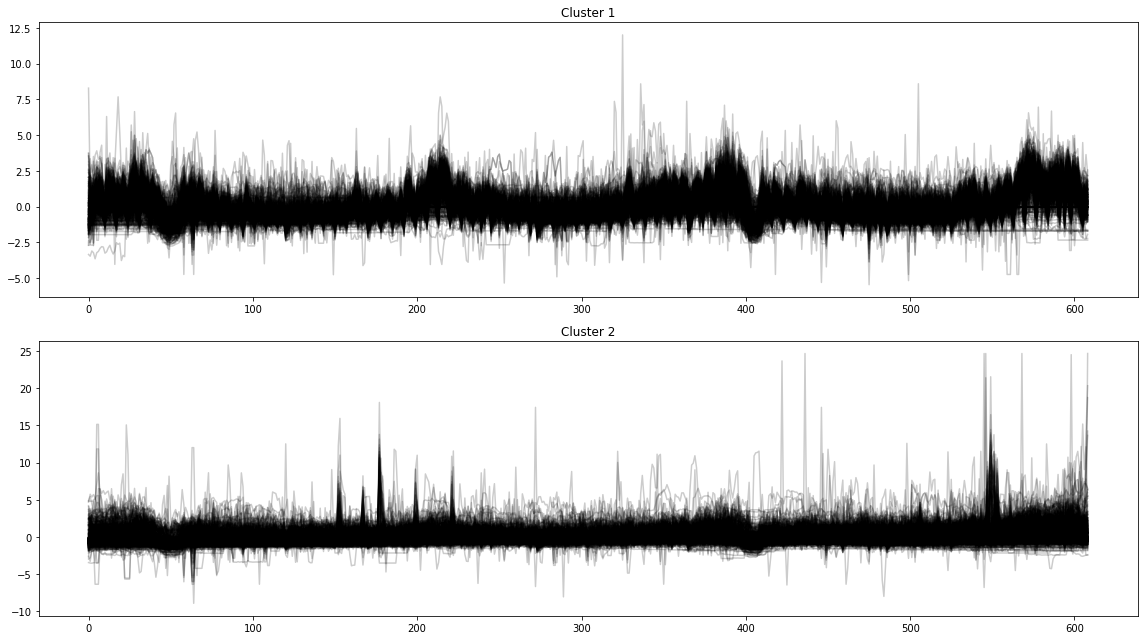

In [27]:
ks = KShape(n_clusters=3, n_init=10, verbose=True, random_state=seed)
y_pred = ks.fit_predict(stack_data)

plt.figure(figsize=(16, 9))
for yi in range(2):
    plt.subplot(2, 1, 1 + yi)
    for xx in stack_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    # plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

Init 1
0.724 --> 0.418 --> 0.389 --> 0.379 --> 0.373 --> 0.368 --> 0.364 --> 0.362 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.360 --> 0.361 --> 
Init 2
0.416 --> 0.387 --> 0.382 --> 0.380 --> 0.380 --> 0.380 --> 0.379 --> 0.379 --> 0.379 --> 0.379 --> 0.379 --> 0.379 --> 
Init 3
0.375 --> 0.366 --> 0.363 --> 0.362 --> 0.362 --> 0.362 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 
Init 4
0.433 --> 0.405 --> 0.390 --> 0.373 --> 0.365 --> 0.363 --> 0.362 --> 0.362 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 
Init 5
0.363 --> 0.361 --> 0.361 --> 0.361 --> 
Init 6
0.450 --> 0.383 --> 0.377 --> 0.376 --> 0.376 --> 0.376 --> 0.376 --> 0.376 --> 0.376 --> 
Init 7
0.365 --> 0.362 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 
Init 8
0.415 --> 0.382 --> 0.368 --> 0.363 --> 0.362 --> 0.362 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 0.361 --> 
Init 9
0.472 --> 0.430 --> 0.380 --> 0.368 --> 0.364 -->

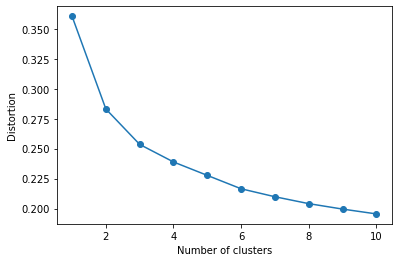

In [28]:
distortions = []

for i in range(1, 11):
    ks = KShape(n_clusters=i, n_init=10, verbose=True, random_state=seed)

    ks.fit(stack_data)

    distortions.append(ks.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Init 1
0.211 --> 0.203 --> 0.201 --> 0.200 --> 0.198 --> 0.198 --> 0.197 --> 0.197 --> 0.197 --> 0.197 --> 0.197 --> 
Init 2
0.213 --> 0.202 --> 0.199 --> 0.197 --> 0.196 --> 0.196 --> 0.196 --> 
Init 3
Resumed because of empty cluster
Init 3
0.212 --> 0.203 --> 0.200 --> 0.198 --> 0.197 --> 0.197 --> 0.197 --> 0.197 --> 
Init 4
Resumed because of empty cluster
Init 4
Resumed because of empty cluster
Init 4
0.223 --> 0.201 --> 0.197 --> 0.196 --> 0.195 --> 0.196 --> 
Init 5
Resumed because of empty cluster
Init 5
0.221 --> 0.210 --> 0.206 --> 0.204 --> 0.202 --> 0.200 --> 0.199 --> 0.198 --> 0.198 --> 0.198 --> 0.198 --> 0.198 --> 
Init 6
0.223 --> 0.208 --> 0.204 --> 0.202 --> 0.201 --> 0.201 --> 0.201 --> 0.200 --> 0.200 --> 


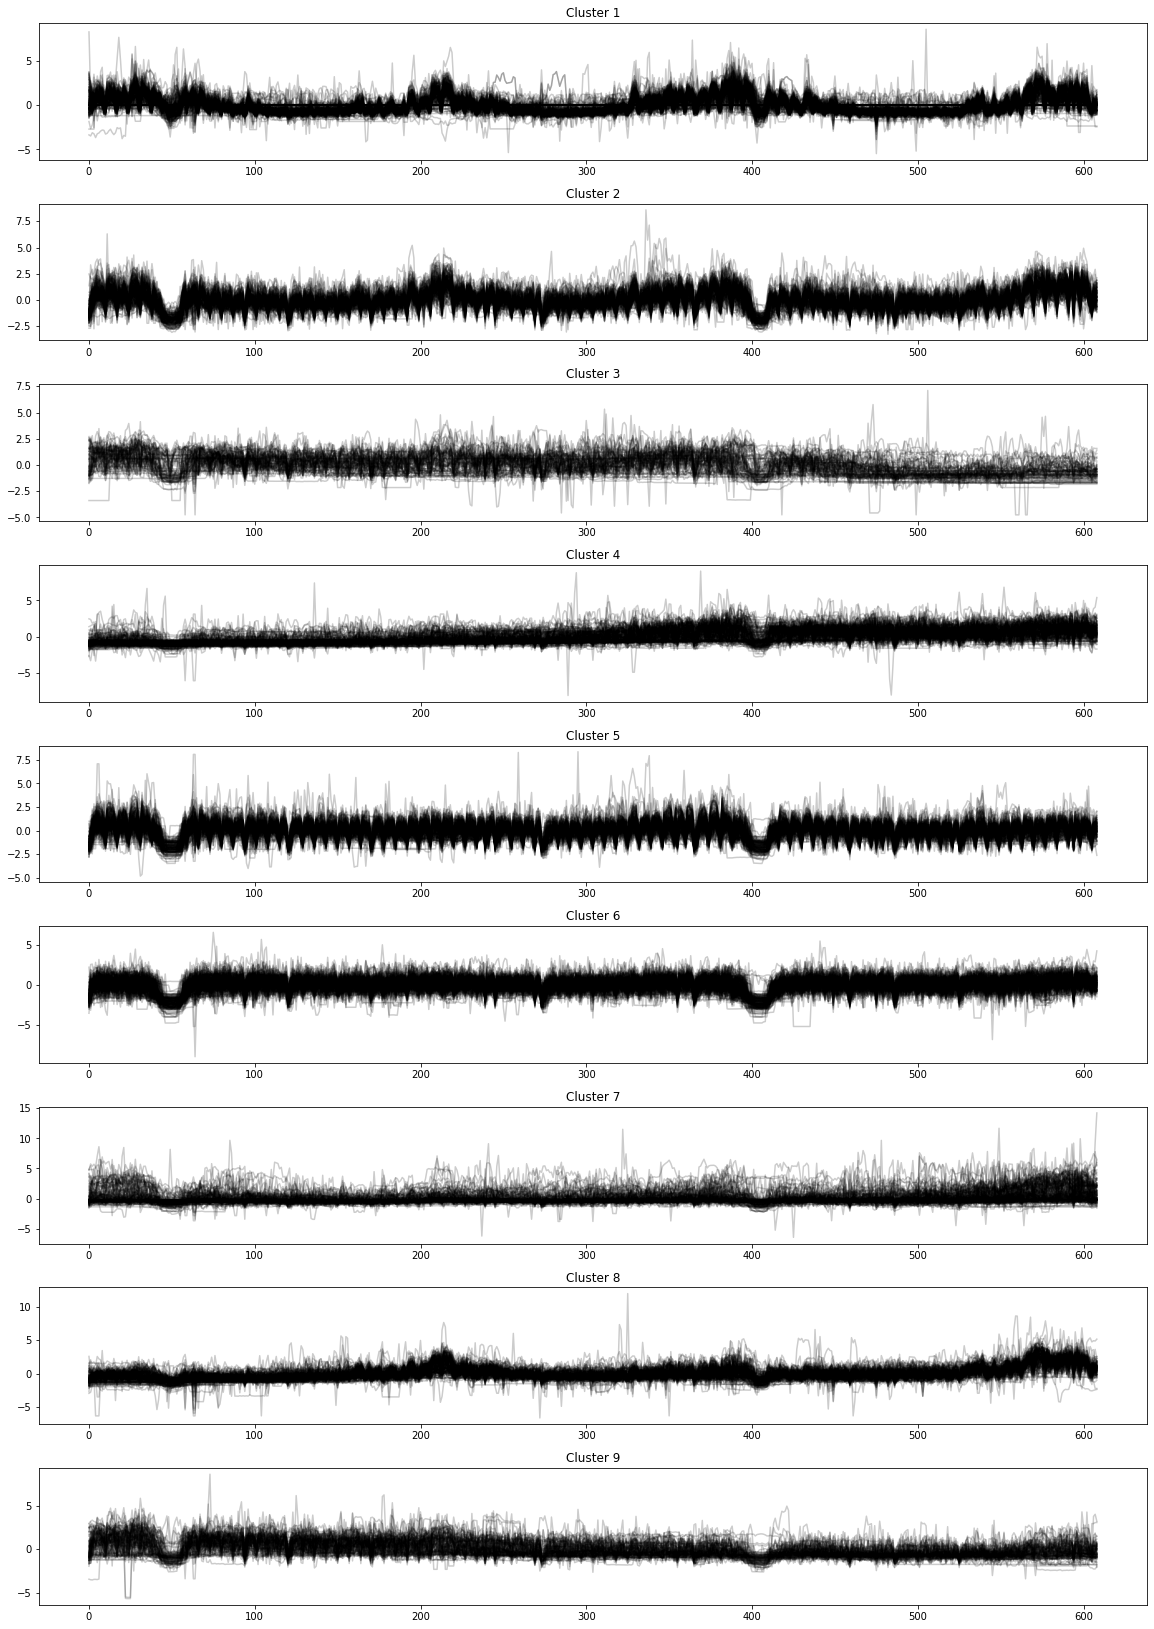

In [32]:
ks = KShape(n_clusters=10, n_init=10, verbose=True, random_state=seed)
y_pred = ks.fit_predict(stack_data)

plt.figure(figsize=(16, 25))
for yi in range(9):
    plt.subplot(10, 1, 1 + yi)
    for xx in stack_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    # plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()